<a href="https://colab.research.google.com/github/EmaanBashir/Natural-Language-Processing/blob/main/nltk_excercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Imports**

In [ ]:
import nltk
import re
import matplotlib
import random
import statistics

## **Excercises**

**1) Create a variable phrase containing a list of words. Review the operations described in the previous chapter, including addition, multiplication, indexing, slicing, and sorting.**

In [ ]:
phrase = ["addition", "multiplication", "indexing", "slicing", "sorting"]
print("phrase + phrase: ", phrase + phrase)
print("phrase * 2: ", phrase * 2)
print("phrase[1]: ", phrase[1])
print("phrase[1:-2]: ", phrase[1:-2])
print("sort: ", sorted(phrase))

phrase + phrase:  ['addition', 'multiplication', 'indexing', 'slicing', 'sorting', 'addition', 'multiplication', 'indexing', 'slicing', 'sorting']
phrase * 2:  ['addition', 'multiplication', 'indexing', 'slicing', 'sorting', 'addition', 'multiplication', 'indexing', 'slicing', 'sorting']
phrase[1]:  multiplication
phrase[1:-2]:  ['multiplication', 'indexing']
sort:  ['addition', 'indexing', 'multiplication', 'slicing', 'sorting']


**2) Use the corpus module to explore austen-persuasion.txt. How many word tokens does this book have? How many word types?**

In [ ]:
nltk.download('gutenberg')
from nltk.corpus import gutenberg

print("gutenberg file ids: ", gutenberg.fileids())
print("number of words in austen-persuasion.txt: ", len(gutenberg.words("austen-persuasion.txt")))
print("number of word types: ", len(set(gutenberg.words("austen-persuasion.txt"))))

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
gutenberg file ids:  ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
number of words in austen-persuasion.txt:  98171
number of word types:  6132


**3) Use the Brown corpus reader nltk.corpus.brown.words() or the Web text corpus reader nltk.corpus.webtext.words() to access some sample text in two different genres.**

In [ ]:
nltk.download('brown')
from nltk.corpus import brown

print("categories: ", brown.categories())
print("humor: ", brown.words(categories = 'humor'))
print("mystery: ", brown.words(categories = "mystery"))

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
categories:  ['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']
humor:  ['It', 'was', 'among', 'these', 'that', 'Hinkle', ...]
mystery:  ['There', 'were', 'thirty-eight', 'patients', 'on', ...]


**4) Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?**

[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.


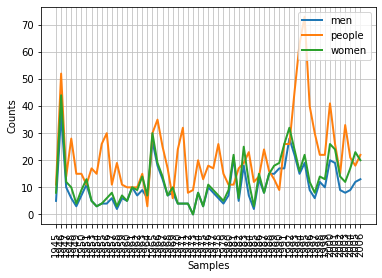

In [ ]:
nltk.download('state_union')
from nltk.corpus import state_union

cfd = nltk.ConditionalFreqDist([(target, fileid[:4]) for fileid in state_union.fileids() for word in state_union.words(fileids=fileid) for target in ['men', 'women', 'people'] if word in target])
cfd.plot()

**5) Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: member_meronyms(), part_meronyms(), substance_meronyms(), member_holonyms(), part_holonyms(), and substance_holonyms()**

In [ ]:
nltk.download('wordnet')
from nltk.corpus import wordnet

computer = wordnet.synset('computer.n.01')

print('Computer: \n')
print('member_meronyms: ', computer.member_meronyms())
print('part_meronyms: ', computer.part_meronyms())
print('substance_meronyms: ', computer.substance_meronyms())
print('member_holonyms: ', computer.member_holonyms())
print('part_holonyms: ', computer.part_holonyms())
print('substance_holonyms: ', computer.substance_holonyms())

room = wordnet.synset('room.n.01')
print('\nRoom: \n')
print('member_meronyms: ', room.member_meronyms())
print('part_meronyms: ', room.part_meronyms())
print('substance_meronyms: ', room.substance_meronyms())
print('member_holonyms: ', room.member_holonyms())
print('part_holonyms: ', room.part_holonyms())
print('substance_holonyms: ', room.substance_holonyms())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Computer: 

member_meronyms:  []
part_meronyms:  [Synset('busbar.n.01'), Synset('cathode-ray_tube.n.01'), Synset('central_processing_unit.n.01'), Synset('chip.n.07'), Synset('computer_accessory.n.01'), Synset('computer_circuit.n.01'), Synset('data_converter.n.01'), Synset('disk_cache.n.01'), Synset('diskette.n.01'), Synset('hardware.n.03'), Synset('keyboard.n.01'), Synset('memory.n.04'), Synset('monitor.n.04'), Synset('peripheral.n.01')]
substance_meronyms:  []
member_holonyms:  []
part_holonyms:  [Synset('platform.n.03')]
substance_holonyms:  []

Room: 

member_meronyms:  []
part_meronyms:  [Synset('ceiling.n.01'), Synset('floor.n.01'), Synset('room_light.n.01'), Synset('wall.n.01')]
substance_meronyms:  []
member_holonyms:  []
part_holonyms:  [Synset('building.n.01')]
substance_holonyms:  []


**6) In the discussion of comparative wordlists, we created an object called translate which you could look up using words in both German and Spanish in order to get corresponding words in English. What problem might arise with this approach? Can you suggest a way to avoid this problem?**

In [ ]:
nltk.download('swadesh')
from nltk.corpus import swadesh

german_to_english = swadesh.entries(['de', 'en'])
spanish_to_english = swadesh.entries(['es', 'en'])

translate = dict(german_to_english)
translate.update(dict(spanish_to_english))

print(translate['perro'])

#The problem is that the same word can exist in both languages. One solution can be to make separate dictionaries for both languages

[nltk_data] Downloading package swadesh to /root/nltk_data...
[nltk_data]   Unzipping corpora/swadesh.zip.
dog


**7) According to Strunk and White's Elements of Style, the word however, used at the start of a sentence, means "in whatever way" or "to whatever extent", and not "nevertheless". They give this example of correct usage: However you advise him, he will probably do as he thinks best. (http://www.bartleby.com/141/strunk3.html) Use the concordance tool to study actual usage of this word in the various texts we have been considering. See also the LanguageLog posting "Fossilized prejudices about 'however'" at http://itre.cis.upenn.edu/~myl/languagelog/archives/001913.html**

In [ ]:
nltk.Text(gutenberg.words("austen-persuasion.txt")).concordance('however')

Displaying 25 of 89 matches:
onceited , silly father . She had , however , one very intimate friend , a sens
early custom . But these measures , however good in themselves , were insuffici
ellynch Hall was to be let . This , however , was a profound secret , not to be
t immediate neighbourhood , which , however , had not suited him ; that acciden
e dues of a tenant . It succeeded , however ; and though Sir Walter must ever l
h , the former curate of Monkford , however suspicious appearances may be , but
good character and appearance ; and however Lady Russell might have asked yet f
siness no evil . She was assisted , however , by that perfect indifference and 
h the others . Something occurred , however , to give her a different duty . Ma
 , but can never alter plain ones . However , at any rate , as I have a great d
l what is due to you as my sister . However , we may as well go and sit with th
o means of her going . She wished , however to see the Crofts , and was glad to
ithout any 

**8) Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females**

In [ ]:
nltk.download('names')
from nltk.corpus import names

cfd = nltk.ConditionalFreqDist([(word[0], fileid[:-4]) for fileid in names.fileids() for word in names.words(fileid)])
cfd.tabulate()

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
  female   male 
A    443    213 
B    246    173 
C    469    166 
D    308    146 
E    251    119 
F    144     87 
G    213    156 
H    124    163 
I     83     45 
J    293    144 
K    276     70 
L    332    113 
M    484    200 
N    158     77 
O     66     52 
P    121    101 
Q      9     15 
R    247    200 
S    309    238 
T    198    188 
U     14     22 
V    105     50 
W     54    151 
X      5      7 
Y     18     16 
Z     31     31 


**9) Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre, etc. Can you find pairs of words which have quite different meanings across the two texts, such as monstrous in Moby Dick and in Sense and Sensibility?**

In [ ]:
humor = nltk.Text(brown.words(categories = 'humor'))
mystery = nltk.Text(brown.words(categories = 'mystery'))
print("Humor: ", humor)
print("Mystery: ", mystery)
print('\nWord Frequency in humor: \n')
fd_humor = nltk.FreqDist(humor)
fd_humor.tabulate()
print('\nWord Frequency in mystery: \n')
fd_mystery = nltk.FreqDist(mystery)
fd_mystery.tabulate()
print('\nmonstrous in humor: \n')
print(humor.concordance('monstrous'))
print('\nmonstrous in mystery: \n')
print(mystery.concordance('monstrous'))

Humor:  <Text: It was among these that Hinkle identified a...>
Mystery:  <Text: There were thirty-eight patients on the bus the...>

Word Frequency in humor: 

                                ,                               the                                 .                                of                               and                                 a                                to                                ``                                ''                                in                               was                              that                                 I                                it                                 ?                               for                               had                                he                               his                               you                              with                                on                                is                                as                         

**10) Read the BBC News article: UK's Vicky Pollards 'left behind' http://news.bbc.co.uk/1/hi/education/6173441.stm. The article gives the following statistic about teen language: "the top 20 words used, including yeah, no, but and like, account for around a third of all words." How many word types account for a third of all word tokens, for a variety of text sources? What do you conclude about this statistic? Read more about this on LanguageLog, at http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html.**

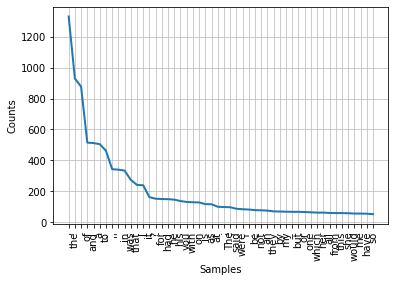

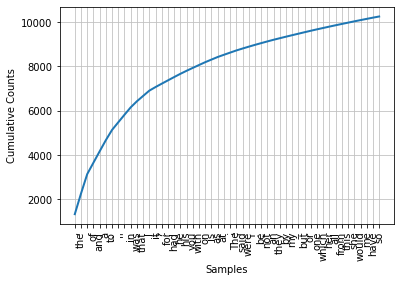

In [ ]:
text = brown.words(categories = 'humor')
fd = nltk.FreqDist(text)
fd.most_common(20)
fd.plot(50)
fd.plot(50,cumulative=True)

**11) Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?**

In [ ]:
cfd = nltk.ConditionalFreqDist((category, word) for category in brown.categories() for word in brown.words(categories = category))
cfd.tabulate(conditions = ['religion', 'mystery', 'humor', 'news'], samples = ['who', 'what', 'where', 'hello', 'state', 'box'])

           who  what where hello state   box 
religion   100    64    20     0    14     1 
 mystery    80   109    59     0     4     3 
   humor    48    36    15     1     5     4 
    news   268    76    58     0    90     2 


**12) The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does it contain? What fraction of words in this dictionary have more than one possible pronunciation?**

In [ ]:
nltk.download('cmudict')
from nltk.corpus import cmudict

words = [word for word, pron in cmudict.entries()]
print('No. of distinct words: ', len(set(words)))

fd = nltk.FreqDist(words)
repeated_words = [w for w in set(words) if fd[w] > 1]

print('Fraction of words having more than one pronunciation = ', len(repeated_words)/len(set(words)))

[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.
No. of distinct words:  123455
Fraction of words having more than one pronunciation =  0.07485318537118789


**13) What percentage of noun synsets have no hyponyms? You can get all noun synsets using wn.all_synsets('n').**

In [ ]:
nouns_syns = [word for word in wordnet.all_synsets('n')]
no_hyp = [syns for syns in nouns_syns if len(syns.hyponyms()) == 0]
print('Percentage of noun synsets having no hyponyms: ', (len(no_hyp)/len(nouns_syns))*100)

Percentage of noun synsets having no hyponyms:  79.67119283931072


**14) Define a function supergloss(s) that takes a synset s as its argument and returns a string consisting of the concatenation of the definition of s, and the definitions of all the hypernyms and hyponyms of s.**

In [ ]:
def supergloss(s):
  hypernyms = ', '.join([syns.definition() for syns in s.hypernyms()])
  hyponyms = ', '.join([syns.definition() for syns in s.hyponyms()])
  return s.definition() + ', ' + hypernyms + ', ' + hyponyms

print(supergloss([w for w in wordnet.all_synsets('n')][12]))

an organism (plant or animal) from which younger ones are obtained, a living thing that has (or can develop) the ability to act or function independently, 


**15) Write a program to find all words that occur at least three times in the Brown Corpus.**

In [ ]:
words = brown.words()
unique = set(words)
fd = nltk.FreqDist(words)
words_more_than_thrice = [word for word in unique if fd[word] >= 3]
print(words_more_than_thrice)

['emerged', 'conceptual', 'detergent', 'soft', 'covered', 'wet', 'discomfort', 'upset', 'Poet', 'Blumberg', 'spreads', 'vanishing', 'boats', 'restoring', 'unconditional', 'Cash', 'Gazette', 'machines', 'They', 'subspace', 'shelters', 'fondness', 'uncertain', 'narrator', 'Treatment', 'Maintenance', 'remedy', 'Expectations', 'blonde', 'beyond', 'prone', 'complex', 'hands', 'profoundly', 'succeed', '2.4', 'meetings', 'brows', 'maple', 'competent', 'Lumumba', 'Hark', 'vapor-pressure', 'interest', 'niece', 'bookkeeping', "Maris's", 'See', 'Stalag', 'ships', "Sandburg's", 'Diseases', 'banquet', 'dropping', 'deficiencies', "father's", 'poorest', 'whispering', 'fellowship', 'monacle', 'retailing', 'severed', 'subway', 'aimless', 'discernible', 'disfigured', 'According', 'overlooked', 'Linda', 'prevails', 'fined', 'traveling', 'Monthly', 'touring', 'strengthened', 'problematic', 'heritage', 'stretch', 'uncharged', 'Conscience', 'Fighting', 'violently', 'spit', 'relic', 'orange', 'darned', 'herb

**16) Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?**

In [ ]:
lexical_diversity = [(genre, len(brown.words(categories = genre)) / len(set(brown.words(categories = genre)))) for genre in brown.categories()]
sorted_list = sorted(lexical_diversity, key = lambda x: x[1])
print('lowest diversity genre: ', sorted_list[0][0], ', diversity score: ', sorted_list[0][1])

lowest diversity genre:  humor , diversity score:  4.324297388877816


**17) Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.**

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

def freq_50(text):
  stop = stopwords.words('english')
  fd = nltk.FreqDist(text)
  words = [word for word in fd]
  for word in words:
    if word.lower() in stop or not word.isalpha():
      fd.pop(word)
  return [word for word, freq in fd.most_common(50)]

print(freq_50(brown.words(categories='humor')))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['said', 'one', 'would', 'time', 'even', 'like', 'could', 'way', 'things', 'get', 'two', 'little', 'Arlene', 'made', 'us', 'man', 'years', 'children', 'told', 'day', 'much', 'people', 'Letch', 'Barco', 'long', 'room', 'say', 'asked', 'home', 'always', 'funny', 'Moreland', 'back', 'know', 'never', 'something', 'last', 'seemed', 'around', 'went', 'called', 'many', 'old', 'thought', 'Welch', 'new', 'think', 'comedy', 'heart', 'every']


**18) Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.**

In [ ]:
stop = stopwords.words('english')
words = brown.words(categories = 'humor')
bigrams = list(nltk.bigrams(words))
fd = nltk.FreqDist(bigrams)
bigrams = [bigram for bigram in fd]
for bigram in bigrams: 
  if bigram[0].lower() in stop or bigram[1].lower() in stop or not bigram[0].isalpha() or not bigram[1].isalpha():
    fd.pop(bigram)
print([bigram for bigram, freq in fd.most_common(50)])

[('years', 'ago'), ('General', 'Burnside'), ('Los', 'Angeles'), ('police', 'captain'), ('ten', 'years'), ('last', 'week'), ('Mother', 'Cabrini'), ('stone', 'wall'), ('five', 'minutes'), ('One', 'day'), ('kitchen', 'sink'), ('two', 'years'), ('New', 'York'), ('Letch', 'Feeley'), ('power', 'tools'), ('long', 'enough'), ('misplaced', 'modifier'), ('Moreland', 'said'), ('Moreland', 'asked'), ('Arlene', 'said'), ('Old', 'Order'), ('piano', 'stool'), ('time', 'Barco'), ('sand', 'dunes'), ('District', 'Attorney'), ('Attorney', 'Welch'), ('next', 'day'), ('would', 'provide'), ('Viola', 'Lake'), ('Byzantine', 'room'), ('may', 'well'), ('one', 'thing'), ('even', 'know'), ('get', 'involved'), ('breakfast', 'room'), ('right', 'time'), ('Bermuda', 'shorts'), ('Eddie', 'Cantor'), ('better', 'part'), ('million', 'dollars'), ('Supreme', 'Court'), ('Miss', 'Poitrine'), ('Chateau', 'Belletch'), ('four', 'thousand'), ('great', 'deal'), ('would', 'help'), ('things', 'done'), ('second', 'car'), ('one', 'at

**19) Write a program to create a table of word frequencies by genre, like the one given in 1 for modals. Choose your own words and try to find words whose presence (or absence) is typical of a genre. Discuss your findings.**

In [ ]:
words = ['hi', 'hello', 'table', 'clown', 'box', 'run', 'rat']
cfd = nltk.ConditionalFreqDist((category, word) for category in brown.categories() for word in brown.words(categories = category))
cfd.tabulate(conditions = words, samples = brown.categories())

            adventure  belles_lettres       editorial         fiction      government         hobbies           humor         learned            lore         mystery            news        religion         reviews         romance science_fiction 
   hi               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0 
hello               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0 
table               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0 
clown       

**20) Write a function word_freq() that takes a word and the name of a section of the Brown Corpus as arguments, and computes the frequency of the word in that section of the corpus.**

In [ ]:
def word_freq(word, section):
  fd = nltk.FreqDist(brown.words(categories=section))
  return fd[word]

print(word_freq('happy', 'humor'))

4


**21) Write a program to guess the number of syllables contained in a text, making use of the CMU Pronouncing Dictionary.**

In [ ]:
def syllables_in_pron(pron):
  return len([w for w in pron if re.findall("[aeiou]",w.lower())])
cmu = cmudict.entries()
words = set(brown.words(categories = 'humor'))
syllables = [syllables_in_pron(pron) for word, pron in cmu if word in words]
print('Total no. of syllables: ', sum(syllables))

Total no. of syllables:  10052


**22) Define a function hedge(text) which processes a text and produces a new version with the word 'like' between every third word.**

In [ ]:
def hedge(text):
  l = []
  count = 0
  words = text.split()
  for word in words:
    if (count % 3 == 0 and count != 0):
      l.append('like')
    l.append(word)
    count += 1
  return l


print(hedge('processes a text and produces a new version with the word'))

['processes', 'a', 'text', 'like', 'and', 'produces', 'a', 'like', 'new', 'version', 'with', 'like', 'the', 'word']


**23) Zipf's Law: Let f(w) be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.**

  a) Write a function to process a large text and plot word frequency against   word rank using pylab.plot. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?

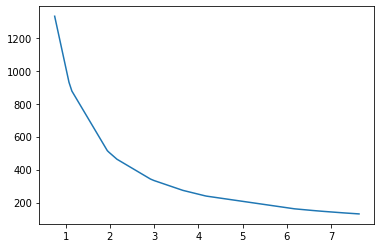

In [ ]:
from matplotlib import pyplot as plt

def freq_rank_plot(text):
  fd = nltk.FreqDist(text).most_common(20) # 20 most frequent words taken so that the graph can be analyzed easily
  freq = [freq for word, freq in fd]
  rank = [1000/freq for freq in freq]
  plt.plot(rank, freq)

freq_rank_plot(brown.words(categories = 'humor'))
  

b) Generate random text, e.g., using random.choice("abcdefg "), taking care to include the space character. You will need to import random first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?

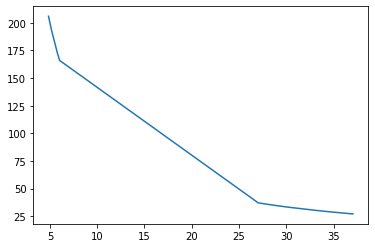

In [ ]:
text = ''

for x in range(100000):
  text += random.choice('abcdefg ')
tokenized = text.split()

freq_rank_plot(tokenized)

**24) Modify the text generation program in 2.2 further, to do the following tasks:**

a) Store the n most likely words in a list words then randomly choose a word from the list using random.choice(). (You will need to import random first.)

In [ ]:
nltk.download('genesis')
from nltk.corpus import genesis

def generate_model(text, n):
  fd = nltk.FreqDist(text)
  freq_n = fd.most_common(n)
  words = [word for word, freq in freq_n]
  return words

print(random.choice(generate_model(brown.words(categories = 'humor'), 50)))



[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.
not


b) Select a particular genre, such as a section of the Brown Corpus, or a genesis translation, one of the Gutenberg texts, or one of the Web texts. Train the model on this corpus and get it to generate random text. You may have to experiment with different start words. How intelligible is the text? Discuss the strengths and weaknesses of this method of generating random text.

In [ ]:
def generate_sentence(text, n):
  words = generate_model(text, n)
  start = [word for word in words if word.istitle()]
  punc = [word for word in words if not word.isalpha() and len(word) == 1]
  other = list(set(words).difference(punc))
  return(list(random.choice(start)) + [random.choice(other) for x in range(n - 2)] + list(random.choice(punc)))

text = brown.words(categories='humor')
random_text = generate_sentence(text, 100)
print(' '.join(random_text))

B u t The if your of `` were I get his this there him an him no her which things they They there they more even your to time had her Mr. The -- other over be way is him and an have I could could as when from her time if his could if their But what her do and we is which they you in your things your get It could made his But were him an even very about by has from But little them all one has or were than did or down been down way !


c) Now train your system using two distinct genres and experiment with generating text in the hybrid genre. Discuss your observations.

In [ ]:
text = brown.words(categories='fiction')
random_text = generate_sentence(text, 100)
print(' '.join(random_text))
text = brown.words(categories='humor')
random_text = generate_sentence(text, 100)
print(' '.join(random_text))

A n d that like or know not my them have go so get into over you you where which to did in what like back when this some go never by a She them where who not like The and on went -- get around old could if a is no go his '' this looked out looked go if their into -- men back at she And him for came one '' time get up the I She over know was is you get where man that were some -- to but is that there men was have get ?
I n They It your him had on their when are `` no to they They up But other did them and we and But his it be what did our Arlene time get It out with as by our than this me over which the and other over your '' about of But our little with from is The I It had his been said had In very an over and on him me way when them other up two if by they for we if two be and way all there Mr. I were Arlene be out me !


**25) Define a function find_language() that takes a string as its argument, and returns a list of languages that have that string as a word. Use the udhr corpus and limit your searches to files in the Latin-1 encoding.**

In [ ]:
nltk.download('udhr')
from nltk.corpus import udhr

def find_language(string):
  return [fileid[:-7] for fileid in udhr.fileids() for word in udhr.words(fileid) if fileid[-6:] == 'Latin1' and string.lower() == word.lower() ]

print("umat: ", find_language('umat'))
print("lair: ", find_language('lair'))

[nltk_data] Downloading package udhr to /root/nltk_data...
[nltk_data]   Unzipping corpora/udhr.zip.
umat:  ['Achehnese', 'Achehnese', 'Indonesian', 'Javanese', 'Javanese', 'Javanese', 'Javanese', 'Javanese', 'Javanese', 'Javanese', 'Javanese', 'Javanese', 'Javanese', 'Javanese', 'Javanese', 'Javanese', 'Javanese', 'Javanese', 'Javanese', 'Javanese', 'Javanese', 'Javanese', 'Madurese', 'Malay_BahasaMelayu', 'Malay_BahasaMelayu', 'Malay_BahasaMelayu', 'Malay_BahasaMelayu', 'Minangkabau']
lair:  ['Javanese']


**26) What is the branching factor of the noun hypernym hierarchy? I.e. for every noun synset that has hyponyms — or children in the hypernym hierarchy — how many do they have on average? You can get all noun synsets using wn.all_synsets('n').**

In [ ]:
synsets = wordnet.all_synsets('n')
no_of_hyponyms = [len(synset.hypernyms()) for synset in synsets]
print("Average number of hyponyms: ", statistics.mean(no_of_hyponyms))


Average number of hyponyms:  0.9237045606770992


**27) The polysemy of a word is the number of senses it has. Using WordNet, we can determine that the noun dog has 7 senses with: len(wn.synsets('dog', 'n')). Compute the average polysemy of nouns, verbs, adjectives and adverbs according to WordNet.**

In [ ]:
noun = [len([x for x in wordnet.synsets(word, 'n')]) for word in wordnet.words()]
noun = [x for x in noun if x != 0]
verb = [len([x for x in wordnet.synsets(word, 'v')]) for word in wordnet.words()]
verb = [x for x in verb if x != 0]
adj = [len([x for x in wordnet.synsets(word, 'a')]) for word in wordnet.words()]
adj = [x for x in adj if x != 0]
adv = [len([x for x in wordnet.synsets(word, 'r')]) for word in wordnet.words()]
adv = [x for x in adv if x != 0]
print("Average polysemy: \n")
print("nouns: ", statistics.mean(noun))
print("verbs: ", statistics.mean(verb))
print("adjectives: ", statistics.mean(adj))
print("adverbs: ", statistics.mean(adv))

Average polysemy: 

nouns:  1.2613680726470338
verbs:  2.6556776556776556
adjectives:  1.4224517204649656
adverbs:  1.2532916759651864


**28) Use one of the predefined similarity measures to score the similarity of each of the following pairs of words. Rank the pairs in order of decreasing similarity. How close is your ranking to the order given here, an order that was established experimentally by (Miller & Charles, 1998): car-automobile, gem-jewel, journey-voyage, boy-lad, coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnace-stove, food-fruit, bird-cock, bird-crane, tool-implement, brother-monk, lad-brother, crane-implement, journey-car, monk-oracle, cemetery-woodland, food-rooster, coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest, lad-wizard, chord-smile, glass-magician, rooster-voyage, noon-string.**

In [ ]:
def similarity(word1, word2):
  syns1 = wordnet.synset(word1 + '.n.01')
  syns2 = wordnet.synset(word2 + '.n.01')

  return syns1.path_similarity(syns2)

text = "car-automobile, gem-jewel, journey-voyage, boy-lad, coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnace-stove, food-fruit, bird-cock, bird-crane, tool-implement, brother-monk, lad-brother, crane-implement, journey-car, monk-oracle, cemetery-woodland, food-rooster, coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest, lad-wizard, chord-smile, glass-magician, rooster-voyage, noon-string"
word_pairs = text.split(", ")
words = [word_pair.split('-') for word_pair in word_pairs]
for w in words:
  print(w[0] + "-" + w[1] + ": ", similarity(w[0], w[1]))

car-automobile:  1.0
gem-jewel:  0.125
journey-voyage:  0.25
boy-lad:  0.3333333333333333
coast-shore:  0.5
asylum-madhouse:  0.125
magician-wizard:  0.16666666666666666
midday-noon:  1.0
furnace-stove:  0.07692307692307693
food-fruit:  0.09090909090909091
bird-cock:  0.0625
bird-crane:  0.1111111111111111
tool-implement:  0.5
brother-monk:  0.125
lad-brother:  0.14285714285714285
crane-implement:  0.1
journey-car:  0.05
monk-oracle:  0.125
cemetery-woodland:  0.1111111111111111
food-rooster:  0.0625
coast-hill:  0.2
forest-graveyard:  0.07142857142857142
shore-woodland:  0.2
monk-slave:  0.2
coast-forest:  0.09090909090909091
lad-wizard:  0.2
chord-smile:  0.09090909090909091
glass-magician:  0.1111111111111111
rooster-voyage:  0.041666666666666664
noon-string:  0.058823529411764705
